In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

pp = pprint.PrettyPrinter(indent=2)
pprint = pp.pprint

In [31]:
i_base2 = bin(6).split('b')[1]
string = (4 - len(i_base2)) * '0' + i_base2
string

'0110'

In [104]:
def basis_vector_string(n: int, i: int):
    """Returns a string corresponding to the ith basis vector in the n-qubit computational basis."""
    assert 0 <= i < 2**n, "i,n must satisfy 0 <= i < 2**n"
    assert type(n) == int, "n is not of type int"
    assert type(i) == int, "i is not of type int"
    i_base2: str = bin(i).split('b')[1]
    fill_zeros: str = (n - len(i_base2)) * '0'
    string = '|' + fill_zeros + i_base2 + '>'
    
    return string


def ket_string(arr: np.ndarray):
    nrows = len(arr)  # TODO: be careful of what happens when a bra is passed.
    n = int(np.log2(nrows))
    string = ""
    for i in range(nrows):
        ci = arr[i,0]  # The probability amplitude for the ith basis state.
        if ci == 0:
            continue
        else:
            string += f"({ci})"
        string += basis_vector_string(n, i)
        string += " "
    return string


In [103]:
basis_vector_string(10, 9)

x = create_state(1)
plus = H @ x  # |+>
minus = H @ Z @ x 
print(ket_string(x))
print(ket_string(plus))
print(ket_string(minus))

(1.0)|0> 
(0.7071067811865475)|0> (0.7071067811865475)|1> 
(0.7071067811865475)|0> (0.7071067811865475)|1> 


In [86]:
# Attempt a more elegant print option
x = 1/np.sqrt(2) * np.array([[1, 0, -1, 0]]).T
print(ket_string(x))
nonzero_indices = np.nonzero(x)
nonzero_probability_amplitudes = x[nonzero_indices]
nonzero_indices
np.where(x != 0, str(x), None)

0.7071067811865475|00>-0.7071067811865475|10>


(array([0, 2]), array([0, 0]))

In [92]:
idxs = np.argwhere(x != 0)
nonzero = x[idxs[:,0]]

array([[ 0.70710678],
       [-0.70710678]])

In [46]:
def create_state(n):
    state = np.zeros((2**n, 1))
    state[0,:] = 1
    return state

def Itensor(n):
    """Returns the matrix (ndarray) corresponding to I^{\otimes n}"""
    return np.eye(2**n)

# Define common quantum logic gates (single qubit operators)
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = 1/np.sqrt(2) * np.array([[1, 1],[1, -1]])

def create_controlled_gate(n, control, target, U):
    pass

# Controlled NOT (CNOT) Gate
CNOT = np.zeros((4,4))
CNOT[0:2,0:2] = I
CNOT[2:4,2:4] = X

### 2-qubit quantum circuit examples

In [5]:
# Create Bell State
xi = create_state(2)  # Create 2-qubit state |00>

# First, create the H (tensor) I gate
G0 = np.kron(H, I)

# Then, create the CNOT_01 gate
G1 = CNOT

# Multiply by CNOT gate
xf = G1 @ G0 @ xi
print(xf)  # Gives correct expected output 1/sqrt(2) (|00> + |11>)

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


### 3-qubit quantum circuit examples

In [12]:
# The exact circuit as above with a third qubit added on

G0 = np.kron(np.kron(H, I), I)
G1 = np.kron(CNOT, I)
xi = create_state(3)

# Construct the circuit
U = G1 @ G0
xf = U @ xi
print(xf)

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]]


In [18]:
# Construct the same quantum circuit as above with a function.
gates = np.array([G0, G1])

def create_circuit(gates):
    """Construct the quantum circuit from an array of unitary gates."""
    U = gates[0]

    for i in range(1, gates.shape[0]):
        U = gates[i] @ U
    return U

U1 = create_circuit(gates)
print(U1 == U)

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [26]:
# Create the quantum circuit H_0 -> CNOT_02 for a 3-qubit system
G0 = np.kron(H, np.eye(2**2))

state0 = np.array([[1, 0]]).T  # Ket |0>
state1 = np.array([[0, 1]]).T  # Ket |1>
M0 = np.outer(state0.conj().T, state0)  # |0><0|
M1 = np.outer(state1.conj().T, state1)  # |1><1|
G1 = np.kron(M0, Itensor(2)) + np.kron(np.kron(M1, I), X)  # CNOT_02
pprint(G1)

xi = create_state(3)  # |000>
U = create_circuit(np.array([G0, G1]))  # Create quantum circuit
xf = U @ xi  # Evolve the initial state

pprint(xf)  # Result is as expected: 1/sqrt(2) (|000> + |101>)


array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])
array([[0.70710678],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.70710678],
       [0.        ],
       [0.        ]])


### Measurement / Partial Measurements on Quantum Circuits

In [155]:
# Perform a complete measurment on a state
def probabilities(arr):
    """Returns an array where the ith entry corresponds to the probability of measuring the state to be the ith basis state."""
    return np.real(arr.conj() * arr)

def measure(arr):
    """Perform a measurement on the state. Returns the index of the basis state to which the wave-function collapses."""
    n = np.log2(arr.shape[0])
    indices = np.arange(2**n)
    probs = probabilities(arr)[:,0]
    collapsed_state_index = np.random.choice(indices, p=probs)
    return collapsed_state_index


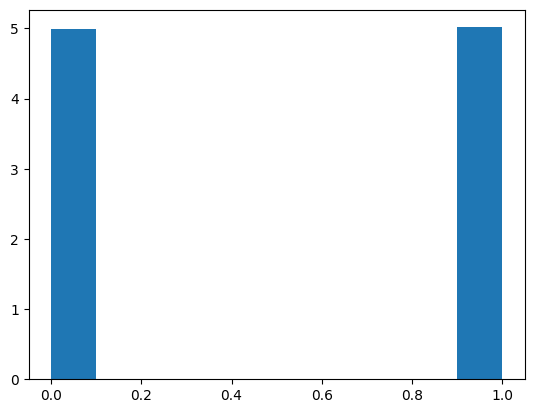

In [165]:
# Create a histogram of measurements on the |+> state
outcomes = np.array([])
for i in range(10000):
    outcome = measure(plus)
    outcomes = np.append(outcomes, outcome)
plt.hist(outcomes, density=True)
plt.show()

In [ ]:
# Partial measurement on a multi-qubit state

In [166]:
# Matrix multiplication methods
x = 1/np.sqrt(2) * np.array([[1,1]]).reshape(2,1)  # |+> state
H @ x
np.tensordot(H, x, axes=1)  # NOTE: axes can actually take an array_like object, which might allow for the expected behavior.

array([[1.00000000e+00],
       [2.23711432e-17]])

In [87]:
# Try to create CNOT via tensor products
state0 = np.array([[1, 0]]).T  # Ket |0>
state1 = np.array([[0, 1]]).T  # Ket |1>

print(np.tensordot(state0.conj().T, state0, axes=0).reshape(2,2))  # Must be reshaped :/
print(np.outer(state1, state1))  # This is more readable.
print(state0.conj().T)
print(np.kron(state0.conj().T, state0))  # Actually works as expected!
print(np.kron(state1.conj().T, state1))

[[1 0]
 [0 0]]
[[0 0]
 [0 1]]
[[1 0]]
[[1 0]
 [0 0]]
[[0 0]
 [0 1]]
